# Machine Learning Template

## Libraries

In [159]:
import pandas as pd
import numpy as np
import missingno

## Data

In [160]:
dataset = pd.read_csv("pokemon.csv")
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Explore

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [162]:
dataset.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


array([[<AxesSubplot:title={'center':'#'}>,
        <AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'HP'}>],
       [<AxesSubplot:title={'center':'Attack'}>,
        <AxesSubplot:title={'center':'Defense'}>,
        <AxesSubplot:title={'center':'Sp. Atk'}>],
       [<AxesSubplot:title={'center':'Sp. Def'}>,
        <AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Generation'}>]], dtype=object)

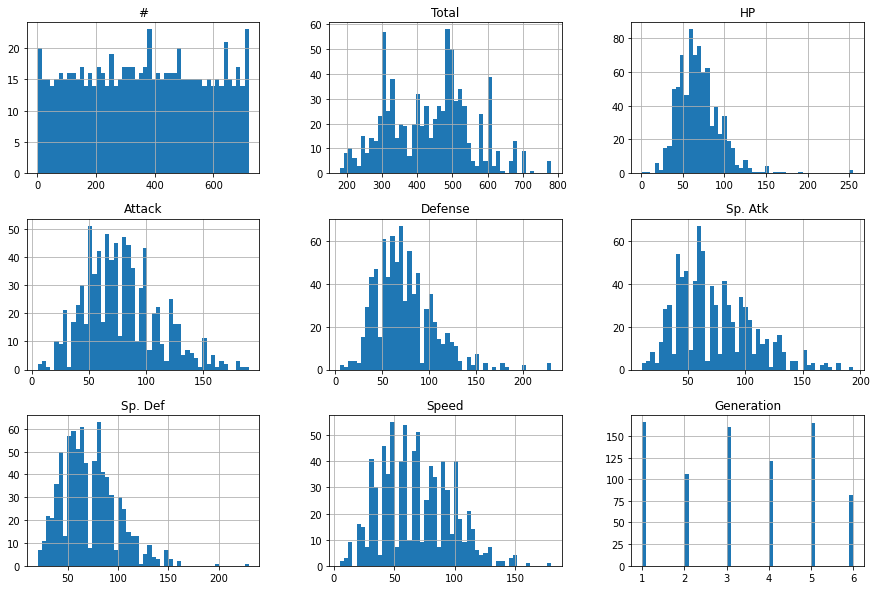

In [163]:
dataset.hist(bins=50, figsize=(15,10))

## Missing values

<AxesSubplot:>

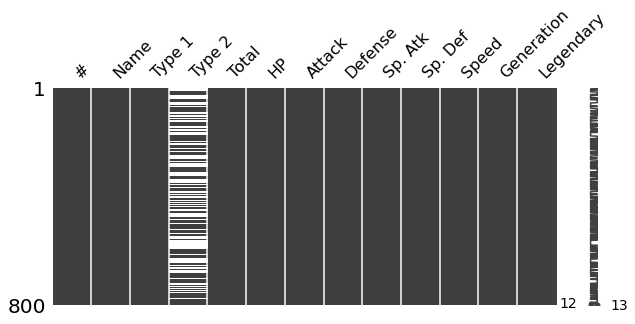

In [164]:
missingno.matrix(dataset, figsize=(10,4))

## Correlations

In [165]:
dataset.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [166]:
dataset.corr()["Attack"].sort_values(ascending=False)

Attack        1.000000
Total         0.736211
Defense       0.438687
HP            0.422386
Sp. Atk       0.396362
Speed         0.381240
Legendary     0.345408
Sp. Def       0.263990
#             0.102298
Generation    0.051451
Name: Attack, dtype: float64

## Preprocessing

### dataset_prep copy

In [167]:
dataset_prep = dataset

### Drop columns

In [168]:
dataset_prep.drop(
    columns=["Type 2", "Name", "#", "Total"], 
    inplace=True # Comment to test run
    )

In [169]:
dataset_prep.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,45,49,49,65,65,45,1,False
1,Grass,60,62,63,80,80,60,1,False
2,Grass,80,82,83,100,100,80,1,False
3,Grass,80,100,123,122,120,80,1,False
4,Fire,39,52,43,60,50,65,1,False


### Imputing missing values

In [170]:
dataset_prep.fillna(
    dataset_prep.mean(), 
    inplace=True # Comment to test run
    )

/var/folders/1r/w4m_7wjs4x7_36lb29x9w0nm0000gn/T/ipykernel_17671/3739331145.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_prep.mean(),


In [171]:
dataset_prep.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,45,49,49,65,65,45,1,False
1,Grass,60,62,63,80,80,60,1,False
2,Grass,80,82,83,100,100,80,1,False
3,Grass,80,100,123,122,120,80,1,False
4,Fire,39,52,43,60,50,65,1,False


### Encoding categorical variables

#### Nominal categorical variables / One-Hot-Encoding

In [172]:
pd.get_dummies(data=dataset_prep, columns=["Type 1"])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,45,49,49,65,65,45,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,True,0,0,...,0,0,0,0,0,0,0,1,0,0
796,50,160,110,160,110,110,6,True,0,0,...,0,0,0,0,0,0,0,1,0,0
797,80,110,60,150,130,70,6,True,0,0,...,0,0,0,0,0,0,1,0,0,0
798,80,160,60,170,130,80,6,True,0,0,...,0,0,0,0,0,0,1,0,0,0


In [173]:
dataset_prep = pd.get_dummies(data=dataset_prep, columns=["Type 1"])
dataset_prep.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,45,49,49,65,65,45,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Encode boolean variable / Yes = 1, No = 0

In [174]:
pd.get_dummies(data=dataset_prep, columns=["Legendary"], drop_first=True)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
0,45,49,49,65,65,45,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1
796,50,160,110,160,110,110,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1
797,80,110,60,150,130,70,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
798,80,160,60,170,130,80,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [175]:
dataset_prep = pd.get_dummies(data=dataset_prep, columns=["Legendary"], drop_first=True)
dataset_prep.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
0,45,49,49,65,65,45,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature scaling

#### Standardiziation

In [176]:
columns = dataset_prep.columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_prep = sc.fit_transform(dataset_prep)

In [177]:
dataset_prep = pd.DataFrame(columns=columns, data=dataset_prep)
dataset_prep

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-0.307232,-0.200779,-0.204124,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,-0.307232,-0.200779,-0.204124,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,-0.307232,-0.200779,-0.204124,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,-0.307232,-0.200779,-0.204124,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,-0.307232,-0.200779,-0.204124,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1.611954,-0.307232,-0.200779,-0.204124,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,4.145096,-0.186893,-0.403473,3.362691
796,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1.611954,-0.307232,-0.200779,-0.204124,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,4.145096,-0.186893,-0.403473,3.362691
797,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1.611954,-0.307232,-0.200779,-0.204124,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,3.610414,-0.241249,-0.186893,-0.403473,3.362691
798,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1.611954,-0.307232,-0.200779,-0.204124,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,3.610414,-0.241249,-0.186893,-0.403473,3.362691


## Create X and y

In [178]:
X = dataset_prep.loc[:, dataset_prep.columns != "Attack"]
y = dataset_prep.loc[:, ["Attack"]]

In [179]:
X.head()

,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
0,-0.950626,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
1,-0.362822,-0.347917,0.219560,0.291156,-0.285015,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
2,0.420917,0.293849,0.831146,1.010283,0.403635,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
3,0.420917,1.577381,1.503891,1.729409,0.403635,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
4,-1.185748,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381


In [180]:
y.head()

,Attack
0,-0.924906
1,-0.524130
2,0.092448
3,0.647369
4,-0.832419


## Split data into test and train

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [182]:
X_train.head()

,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
797,0.420917,-0.444182,2.360112,2.088973,0.059310,1.611954,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,3.610414,-0.241249,-0.186893,-0.403473,3.362691
411,-0.362822,0.839350,-0.544924,0.291156,-0.629341,-0.195001,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,5.350666,-0.403473,-0.297381
0,-0.950626,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
318,0.577665,-0.989683,-0.055654,-1.039228,-0.698206,-0.195001,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,2.676428,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
555,-0.362822,0.037142,-0.392027,0.111375,0.506933,1.009636,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381


In [183]:
X_test.head()

,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary_True
8,0.342543,0.133407,2.635326,1.549628,1.092286,-1.399637,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
510,0.812786,0.037142,0.586511,0.470938,-0.285015,0.407318,-0.307232,-0.200779,-0.204124,-0.241249,...,3.229330,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
175,-1.342496,-1.278478,-1.156510,-0.967315,-1.662316,-0.797319,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,2.676428,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
735,-0.284448,-0.508359,0.005504,-0.643708,0.128175,1.611954,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,-0.403473,-0.297381
242,0.224982,0.037142,0.984043,0.111375,-0.801503,-0.797319,-0.307232,-0.200779,-0.204124,-0.241249,...,-0.309662,-0.204124,-0.175863,-0.373632,-0.190445,-0.276977,-0.241249,-0.186893,2.478479,-0.297381


In [184]:
y_train.head()

,Attack
797,0.955658
411,-0.123354
0,-0.924906
318,-0.246670
555,-0.585788


In [185]:
y_test.head()

,Attack
8,0.770685
510,0.400737
175,-1.017393
735,-0.894077
242,0.801513


## Predicting the Test set results

In [186]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [187]:
y_pred = model.predict(X_test)
y_pred

array([[ 0.75182738],
       [ 0.03893676],
       [-1.40637574],
       [-0.03723512],
       [-0.0808975 ],
       [-0.84582887],
       [ 1.71113335],
       [ 0.24921929],
       [ 0.24792113],
       [ 0.22769625],
       [-0.20129762],
       [ 0.56237426],
       [-0.83801637],
       [ 0.4816025 ],
       [ 0.51484429],
       [ 0.73229613],
       [ 0.66588988],
       [-0.92004762],
       [ 1.31530395],
       [-0.74886625],
       [-0.61605375],
       [ 0.43281304],
       [-0.51379762],
       [ 0.09167113],
       [ 1.50507867],
       [ 0.15417113],
       [-0.88098512],
       [ 0.239415  ],
       [ 0.33190551],
       [-0.14270387],
       [-0.0401648 ],
       [ 0.16588988],
       [-0.24817262],
       [-0.01379762],
       [ 0.37292113],
       [ 0.64635863],
       [-0.67074125],
       [-0.63879762],
       [ 0.64635863],
       [-0.42395387],
       [-0.94739137],
       [-0.11438355],
       [-0.62317262],
       [-0.65511625],
       [-0.40121   ],
       [ 0

In [188]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5864628662246637